# LASSO Regression

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
pd.set_option("display.max_columns", 500)

<IPython.core.display.Javascript object>

In [4]:
# Loading in the dataset
data = pd.read_csv("Data/data.csv", index_col=[0])
data = data.drop(
    [
        "rpl_theme1",
        "rpl_theme2",
        "rpl_theme3",
        "rpl_theme4",
        "spl_theme1",
        "spl_theme2",
        "spl_theme3",
        "spl_theme4",
        "spl_themes",
        "f_total",
    ],
    axis=1,
)
data

,state,county,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,rpl_themes,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4
0,ALABAMA,Autauga,594.443459,0.5401,0.2745,0.2860,0.4397,0.1850,0.7529,0.7905,0.3792,0.6336,0.5113,0.6017,0.7408,0.2964,0.4846,0.1525,0.4354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ALABAMA,Baldwin,1589.793007,0.2239,0.3121,0.2057,0.3209,0.6428,0.4323,0.3524,0.1391,0.5158,0.3582,0.9713,0.5339,0.2604,0.1328,0.3018,0.2162,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,ALABAMA,Barbour,885.001636,0.9631,0.9217,0.9481,0.9701,0.4893,0.3327,0.9064,0.9468,0.8965,0.7052,0.2416,0.9280,0.8198,0.8685,0.9449,0.9959,1,1,1,1,4,0,0,1,1,2,0,0,0,0,1,0,0,1,2
3,ALABAMA,Bibb,622.461089,0.4430,0.7895,0.8987,0.7351,0.3200,0.2846,0.6074,0.1706,0.6390,0.2270,0.4317,0.9207,0.0981,0.5441,0.9214,0.6003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
4,ALABAMA,Blount,644.830460,0.4723,0.2611,0.7561,0.8405,0.4715,0.6406,0.3763,0.2961,0.4206,0.7170,0.1512,0.8816,0.3703,0.2420,0.1165,0.4242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,WYOMING,Sweetwater,10426.975725,0.3127,0.4490,0.1497,0.2668,0.0293,0.9150,0.2041,0.7679,0.5680,0.7052,0.7307,0.8306,0.4817,0.0503,0.2582,0.3701,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3138,WYOMING,Teton,3996.844622,0.0522,0.0264,0.0051,0.0548,0.1334,0.1506,0.0060,0.2216,0.5400,0.9000,0.8109,0.1442,0.9688,0.0503,0.7561,0.1127,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1
3139,WYOMING,Uinta,2081.719807,0.3430,0.6032,0.4443,0.1347,0.0675,0.9685,0.6488,0.2665,0.4136,0.4642,0.7453,0.8816,0.7249,0.1971,0.2582,0.4522,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3140,WYOMING,Washakie,2238.672972,0.3360,0.6207,0.4035,0.3792,0.7380,0.7122,0.4448,0.2961,0.5330,0.2270,0.1958,0.5384,0.4457,0.3715,0.4995,0.3732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [5]:
# Creating dummy variables for binary data
# df = pd.get_dummies(
#     data,
#     columns=[
#         "f_pov",
#         "f_unemp",
#         "f_pci",
#         "f_nohsdp",
#         "f_age65",
#         "f_age17",
#         "f_disabl",
#         "f_sngpnt",
#         "f_minrty",
#         "f_limeng",
#         "f_munit",
#         "f_mobile",
#         "f_crowd",
#         "f_noveh",
#         "f_groupq",
#     ],
# )
# df

<IPython.core.display.Javascript object>

In [8]:
# Preparing X and Y
y = data["rpl_themes"]
X = data.iloc[:, 2:19]
X = X.drop("rpl_themes", 1)
list_numerical = X.columns
X

,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq
0,594.443459,0.5401,0.2745,0.2860,0.4397,0.1850,0.7529,0.7905,0.3792,0.6336,0.5113,0.6017,0.7408,0.2964,0.4846,0.1525
1,1589.793007,0.2239,0.3121,0.2057,0.3209,0.6428,0.4323,0.3524,0.1391,0.5158,0.3582,0.9713,0.5339,0.2604,0.1328,0.3018
2,885.001636,0.9631,0.9217,0.9481,0.9701,0.4893,0.3327,0.9064,0.9468,0.8965,0.7052,0.2416,0.9280,0.8198,0.8685,0.9449
3,622.461089,0.4430,0.7895,0.8987,0.7351,0.3200,0.2846,0.6074,0.1706,0.6390,0.2270,0.4317,0.9207,0.0981,0.5441,0.9214
4,644.830460,0.4723,0.2611,0.7561,0.8405,0.4715,0.6406,0.3763,0.2961,0.4206,0.7170,0.1512,0.8816,0.3703,0.2420,0.1165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,10426.975725,0.3127,0.4490,0.1497,0.2668,0.0293,0.9150,0.2041,0.7679,0.5680,0.7052,0.7307,0.8306,0.4817,0.0503,0.2582
3138,3996.844622,0.0522,0.0264,0.0051,0.0548,0.1334,0.1506,0.0060,0.2216,0.5400,0.9000,0.8109,0.1442,0.9688,0.0503,0.7561
3139,2081.719807,0.3430,0.6032,0.4443,0.1347,0.0675,0.9685,0.6488,0.2665,0.4136,0.4642,0.7453,0.8816,0.7249,0.1971,0.2582
3140,2238.672972,0.3360,0.6207,0.4035,0.3792,0.7380,0.7122,0.4448,0.2961,0.5330,0.2270,0.1958,0.5384,0.4457,0.3715,0.4995


<IPython.core.display.Javascript object>

In [9]:
# Lasso Regression
warnings.filterwarnings("ignore")  # Warnings about using iloc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize Values
scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

# Fitting LASSO Model
reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)

# Measures of Accuracy
print("R squared training set", round(reg.score(X_train, y_train), 2))
print("R squared test set", round(reg.score(X_test, y_test), 2))

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print("MSE training set", round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print("MSE test set", round(mse_test, 2))

R squared training set 0.0
R squared test set -0.0
MSE training set 0.08
MSE test set 0.08


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'LASSO Coefficients vs Regularization Parameters')

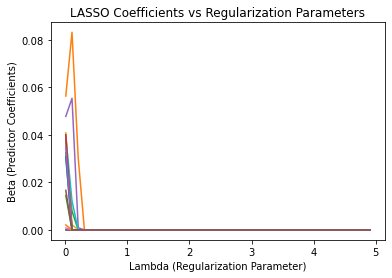

<IPython.core.display.Javascript object>

In [10]:
# Graph
coef = []
alphas = np.arange(0.01, 5, 0.10)
lasso = Lasso(max_iter=10000)

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coef.append(lasso.coef_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas, coef)
ax.set_xlabel("Lambda (Regularization Parameter)")
ax.set_ylabel("Beta (Predictor Coefficients)")
ax.set_title("LASSO Coefficients vs Regularization Parameters")

In [11]:
# K Fold Cross Validation
model = LassoCV(cv=10, random_state=1, max_iter=10000)
model.fit(X_train, y_train)
model.alpha_

0.0002409556694020056

<IPython.core.display.Javascript object>

In [12]:
coefs = np.array(model.coef_)
coefs

array([0.00044362, 0.04899944, 0.04046806, 0.03757002, 0.04745324,
       0.03529129, 0.0358954 , 0.03875721, 0.0401955 , 0.04113113,
       0.03899935, 0.03531677, 0.03857703, 0.04049119, 0.03746301,
       0.0369291 ])

<IPython.core.display.Javascript object>